In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

In [3]:
def dice(n):
    return np.random.choice(np.arange(1,11,1),size=n)

In [65]:
results = []
for jj in range(500):
    result = []
    for ii in range(1000):
        temp = dice(3)
        result.append(np.logical_and((temp[-1] != temp[0]),(temp[-1] != temp[1])))
    result = np.array(result)
    results.append(np.sum(result)/1000)
    

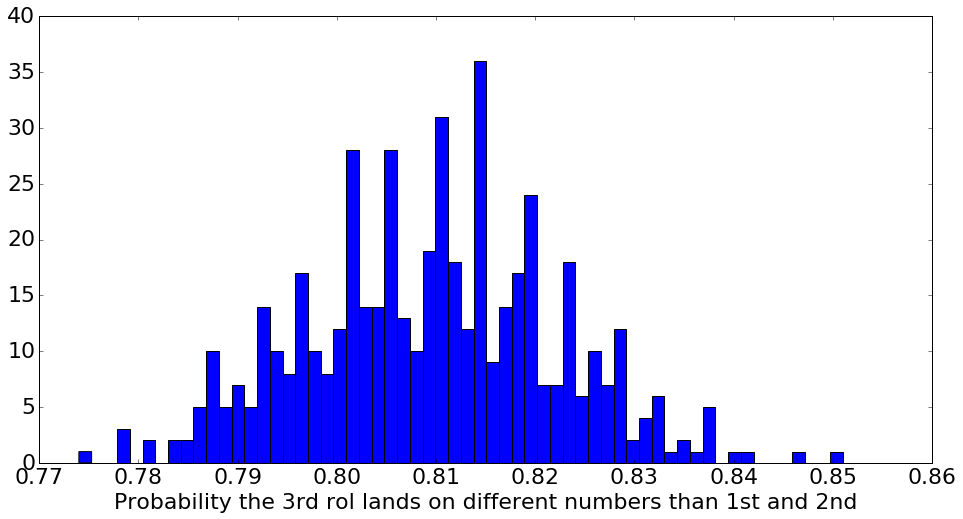

In [66]:
fig,ax = plt.subplots(figsize=(16,8))
_=ax.hist(results,bins=60)
_=ax.set(xlabel='Probability the 3rd rol lands on different numbers than 1st and 2nd')

In [84]:
ns = np.arange(3,11,1)
results = np.zeros((len(ns),100))
for a,n in enumerate(ns):
    
    for jj in range(100):
        result = []
        for ii in range(500):
            temp = dice(n)
            result.append(all(tuple([temp[-1] != temp[k] for k in range(n-1)])))
        result = np.array(result)
        results[a,jj]=np.sum(result)/500

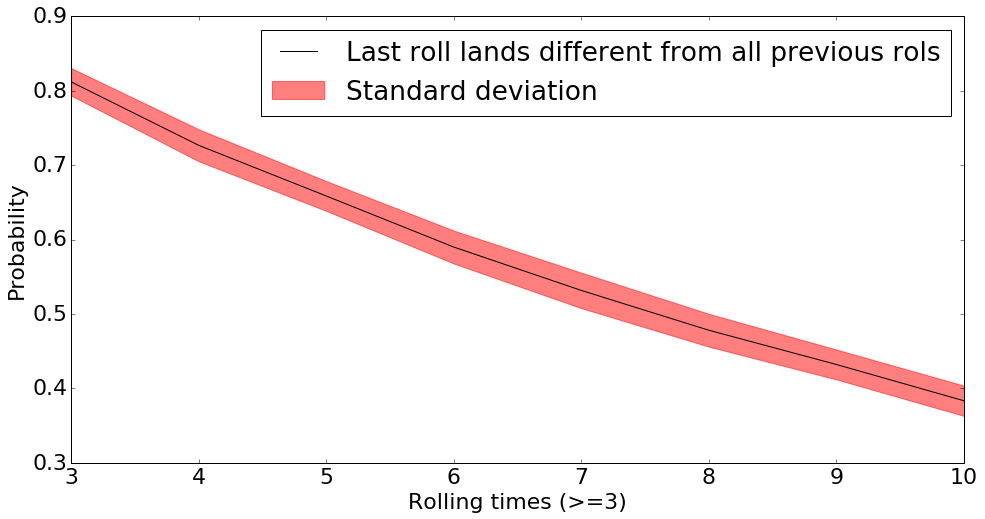

In [94]:
fig,ax = plt.subplots(figsize=(16,8))
results_mean = results.mean(1)
results_se = results.std(1)
ax.plot(ns,results_mean,'k-',alpha=1.,label='Last roll lands different from all previous rols')
ax.fill_between(ns,results_mean+results_se,results_mean-results_se,color='r',alpha=0.5,label='Standard deviation')
_=ax.set(xlabel='Rolling times (>=3)',ylabel='Probability')
_=ax.legend(loc='best')

array([ 0.812  ,  0.7267 ,  0.65862,  0.58996,  0.53166,  0.47814,
        0.43212,  0.38336])